Датасет содержит следующие признаки:

* age — возраст
* sex — пол (1 - мужчина, 0 - женщина)
* cp — тип боли в груди (4 значения)
* trestbps — артериальное давление в покое
* chol — холестерин сыворотки в мг/дл
* fbs — уровень сахара в крови натощак > 120 мг/дл
* restecg — результаты электрокардиографии в покое (значения 0,1,2)
* thalach — достигнута максимальная частота сердечных сокращений
* exang — стенокардия, вызванная физической нагрузкой
* oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с * состоянием покоя
* slope — наклон пикового сегмента ST при нагрузке
* ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
* thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [18]:
import pandas as pd

heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Задание 8.1

Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum().

In [20]:
heart['old']=heart['age'].apply(lambda x: 1 if x>60 else 0)

In [21]:
heart['old'].sum()

79

***

### Задание 8.2

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

In [22]:
def trestbps_mean(age=0, sex=0):
    """_определятель среднего систолического давления_

    Args:
        age (_int_): _возраст_
        sex (_int_): _пол_
    Return:
        result (_int_): _нормальное систолическое давление для переданного возраста_
    """
    if sex == 1:
        if age <= 20:
            return 123
        elif 21 <= age <= 30:
            return 126
        elif 31 <= age <= 40:
            return 129
        elif 41 <= age <= 50:
            return 135
        elif 51 <= age <= 60:
            return 142
        elif age >= 61:
            return 142
    else:
        if age <= 20:
            return 116
        elif 21 <= age <= 30:
            return 120
        elif 31 <= age <= 40:
            return 127
        elif 41 <= age <= 50:
            return 137
        elif 51 <= age <= 60:
            return 144
        elif age >= 61:
            return 159

heart['trestbps_mean'] = heart.apply(lambda x: trestbps_mean(x.age, x.sex), axis=1)

In [23]:
heart['trestbps_mean'][300]

142

***

### Задание 8.5

Закодируйте вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию.

Сколько признаков получилось в датасете?

In [24]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal']) 
type_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']]) 
heart = pd.concat([heart, type_bin], axis=1)
heart=heart.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1)


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


In [25]:
heart.shape

(303, 30)

***

### Задание 8.6

Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [32]:
columns_num = list(list(heart.dtypes[(heart.dtypes == 'int64') | (heart.dtypes == 'float64')].index))

In [34]:
from sklearn import preprocessing

r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(heart)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=columns_num)



In [36]:
df_r['chol'].std().round(6)

0.816232

***

### Задание 8.7

Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

<Axes: >

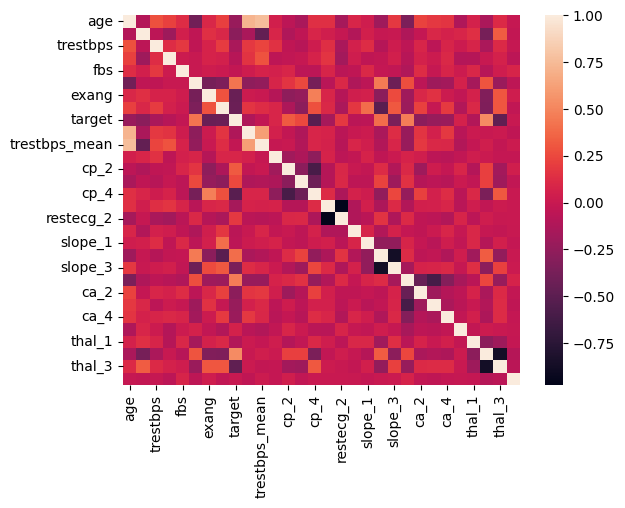

In [40]:
# импортируем seaborn для построения графиков
import seaborn as sns

# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(df_r.corr(numeric_only=True))